**In this notebook starts the analysis of event detention by hour and by day.**

In [1]:
#importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor2.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

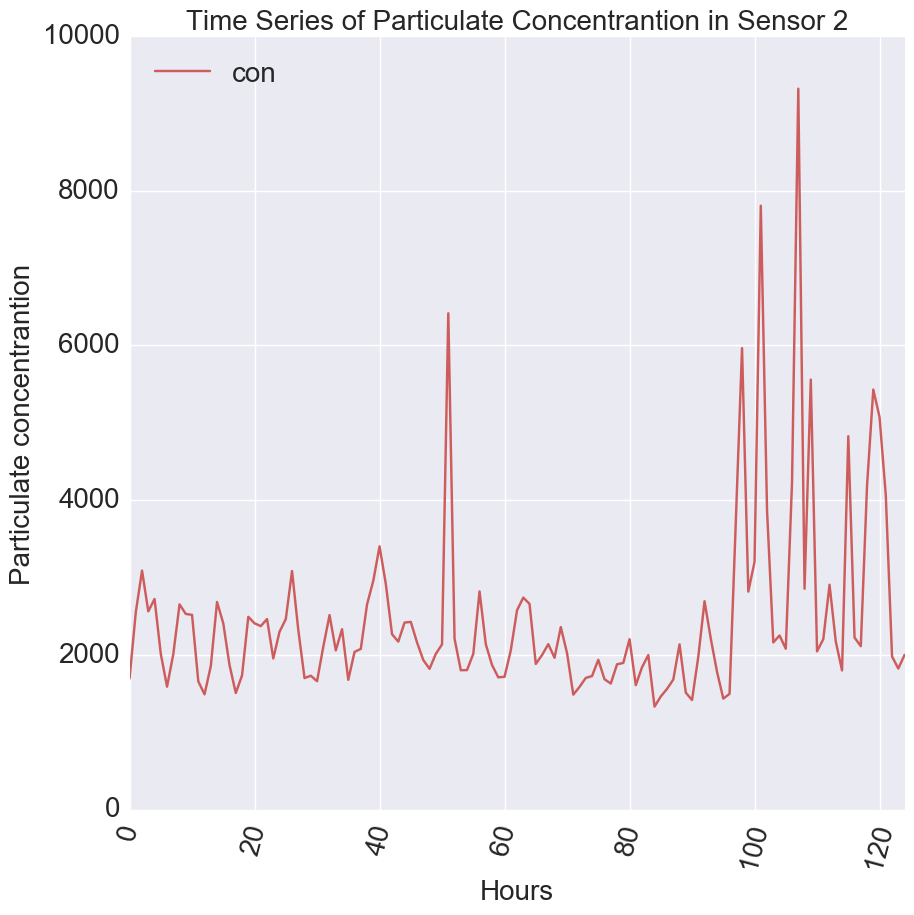

In [4]:
ax = sensor.con.plot(figsize=(10,10), color="IndianRed")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Time Series of Particulate Concentrantion in Sensor 2', fontsize=20)

**Fig.7:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St.

In [5]:
#Analysing the threesolds

In [6]:
print ("mean con by hour {:.2f}".format(sensor['con'].mean()))
print ("stdev con by hour {:.2f}".format(sensor['con'].std()))
thresholds = [sensor['con'].mean() + 3 * sensor['con'].std(), 
              sensor['con'].mean() - 3 * sensor['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date), min(sensor.time)

mean con by hour 2460.03
stdev con by hour 1209.59
3-sigma thresholds 6088.80 -1168.75
earliest datapoint: 2016-06-21 00:00:00


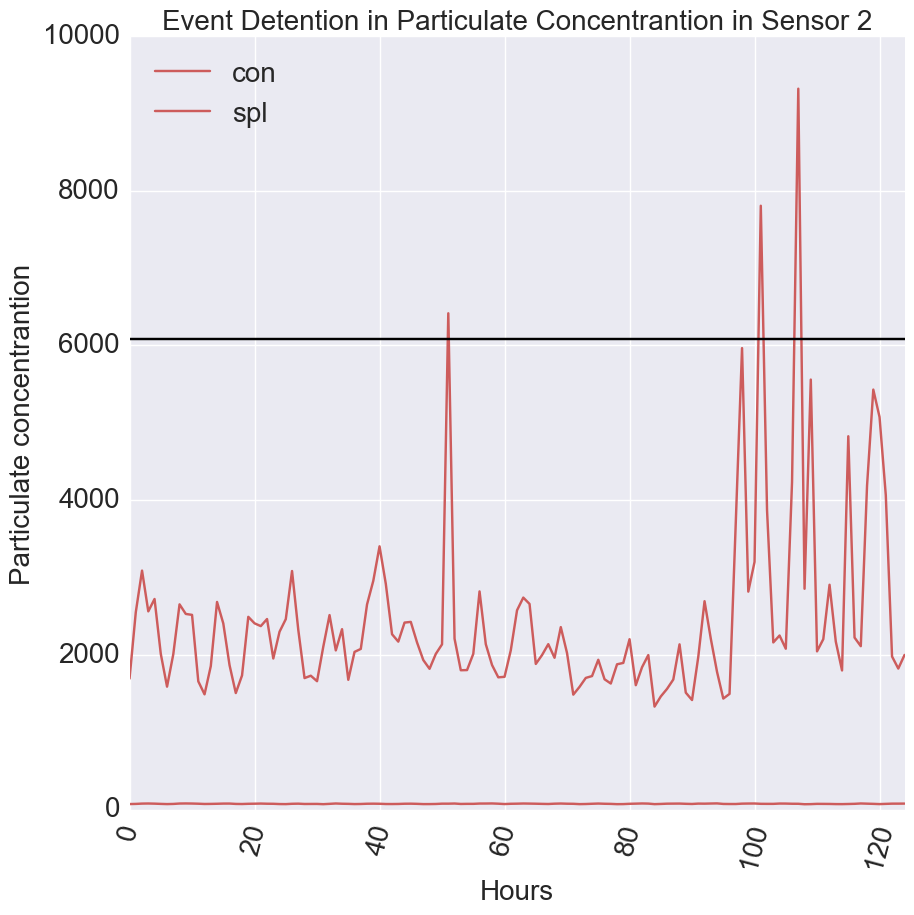

In [7]:
ax = sensor.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Event Detention in Particulate Concentrantion in Sensor 2', fontsize=20)

**Fig.8:** Event detention and times series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen that there are 3 spikes that overpass the upper threesold.

In [8]:
print 'The event detected is: '
sensor[(sensor.con > thresholds[0])]

The event detected is: 


,sensor,con,spl,date,time
51,sensor_2,6415.70250,75.356546,2016-06-29,12:00:00
101,sensor_2,7805.96125,73.556487,2016-07-07,20:00:00
107,sensor_2,9319.34625,73.997845,2016-07-08,20:00:00


The information of the events is as it can be seen in the previous table. 

The most promint event is 29/06 at 12:00 and the values of the particles concentantration is : 
6415.702 particles per 0.01 cubic feet. 

The next two are very closed to each other 07-07  and 08-07 both at 20:00 pm with similar concentrations of a value of 7805.96125 and 73.99.

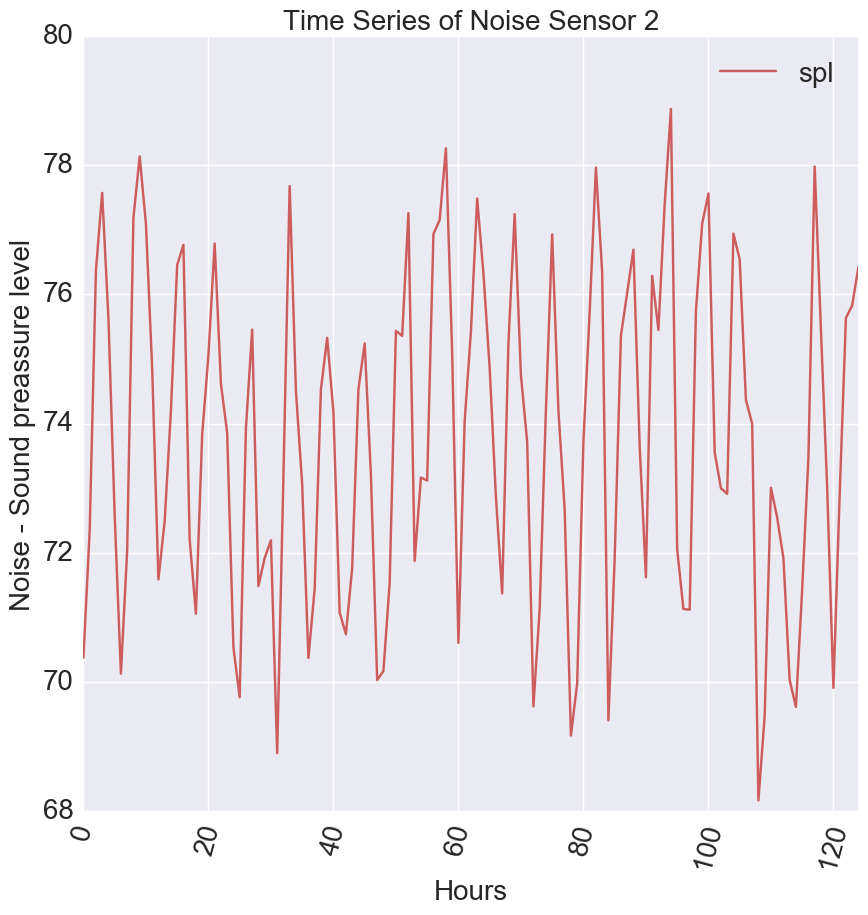

In [9]:
sensor.spl.plot(figsize=(10,10), color="IndianRed")
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Time Series of Noise Sensor 2', fontsize=20)

**Fig.9:** Time Series of noise (sound pressure level in dB) by hour measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen as very uniform

In [10]:
print ("mean con by hour {:.2f}".format(sensor['spl'].mean()))
print ("stdev con by hour {:.2f}".format(sensor['spl'].std()))
thresholds = [sensor['spl'].mean() + 3 * sensor['spl'].std(), 
              sensor['spl'].mean() - 3 * sensor['spl'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by hour 73.80
stdev con by hour 2.57
3-sigma thresholds 81.52 66.08
earliest datapoint: 2016-06-21 00:00:00


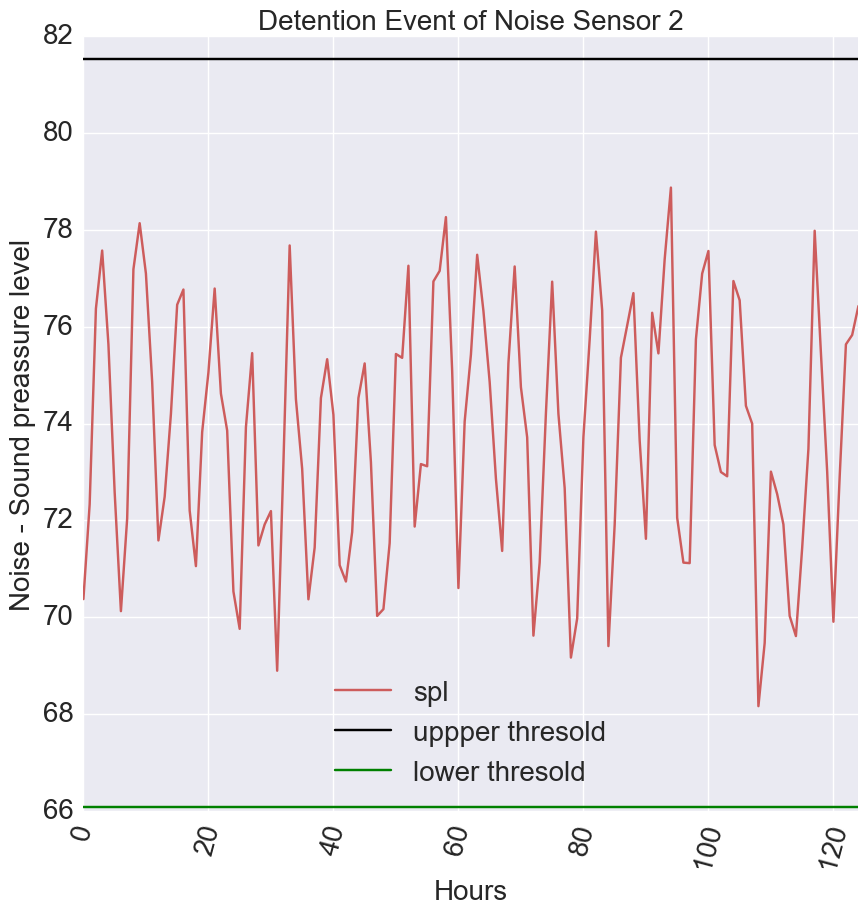

In [11]:
ax = sensor.spl.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k', label = 'uppper thresold')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='green', label = 'lower thresold')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'best',fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Detention Event of Noise Sensor 2', fontsize=20)

**Fig.10:** Event detention and Time Series of noise (sound pressure level in dB)  by hour measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen as very uniform. It can be seen that as the time series is uniform , there within the 2 threesold so there is no especial event in noise level.

In [12]:
# arithmetic assertation:

In [13]:
sensor.loc[(sensor.spl > thresholds[0])]

,sensor,con,spl,date,time


In [14]:
sensor.loc[(sensor.spl < thresholds[1])]

,sensor,con,spl,date,time


It can be seen that there no event that overpass the threesholds.

In [15]:
# grouping by day

In [16]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [17]:
# Threshold for concentration level

In [18]:
print ("mean con by day {:.2f}".format(sensor_con_date['con'].mean()))
print ("stdev con by day {:.2f}".format(sensor_con_date['con'].std()))
thresholds = [sensor_con_date['con'].mean() + 3 * sensor_con_date['con'].std(), 
              sensor_con_date['con'].mean() - 3 * sensor_con_date['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 14643.01
stdev con by day 4129.51
3-sigma thresholds 27031.53 2254.49
earliest datapoint: 2016-06-21 00:00:00


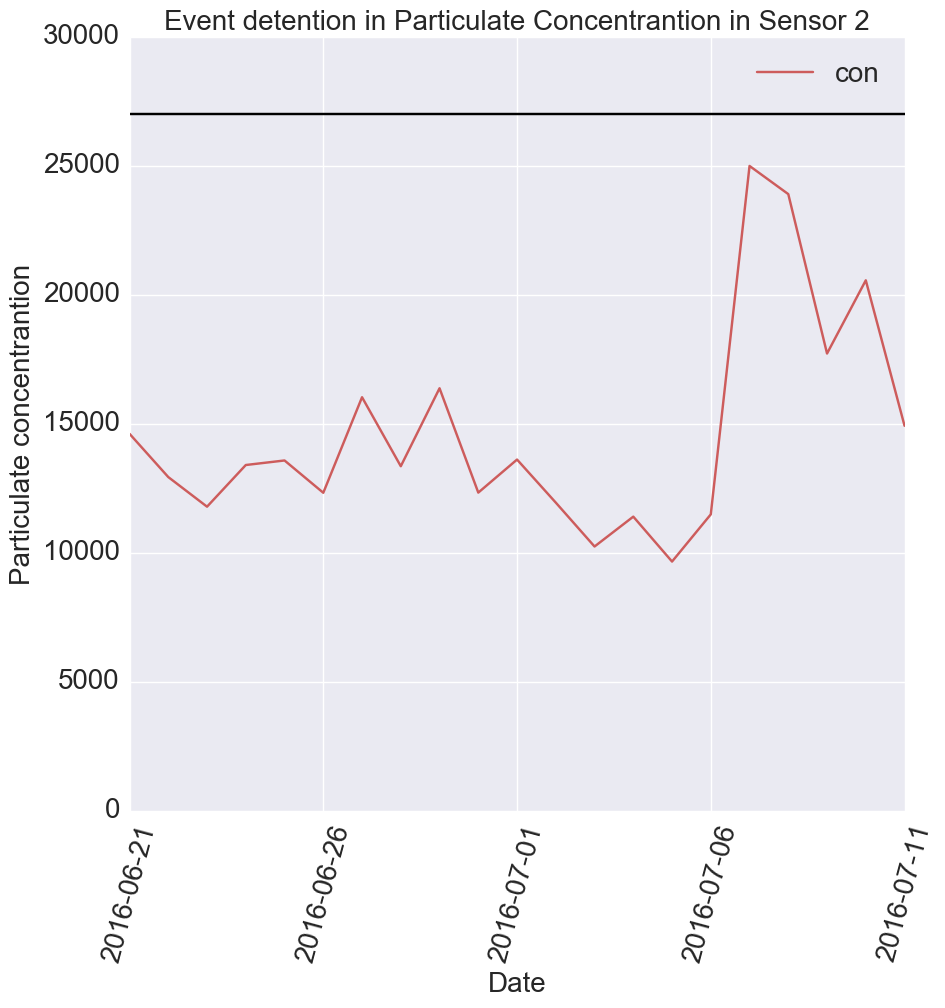

In [19]:
ax = sensor_con_date.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Event detention in Particulate Concentrantion in Sensor 2', fontsize=20)

**Fig.11:** Event detention and times series of Particulate Concentrantion (particle count per 0.01 cubic feet) by day  measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. 

In [20]:
sensor_con_date.loc[(sensor_con_date.con > thresholds[0])]

,con
date,


In [21]:
# Threeshold for noise level

In [22]:
print ("mean con by day {:.2f}".format(sensor_spl_date['spl'].mean()))
print ("stdev con by day {:.2f}".format(sensor_spl_date['spl'].std()))
thresholds = [sensor_spl_date['spl'].mean() + 3 * sensor_spl_date['spl'].std(), 
              sensor_spl_date['spl'].mean() - 3 * sensor_spl_date['spl'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print "earliest datapoint:", min(sensor.date),min(sensor.time)

mean con by day 439.27
stdev con by day 17.02
3-sigma thresholds 490.33 388.21
earliest datapoint: 2016-06-21 00:00:00


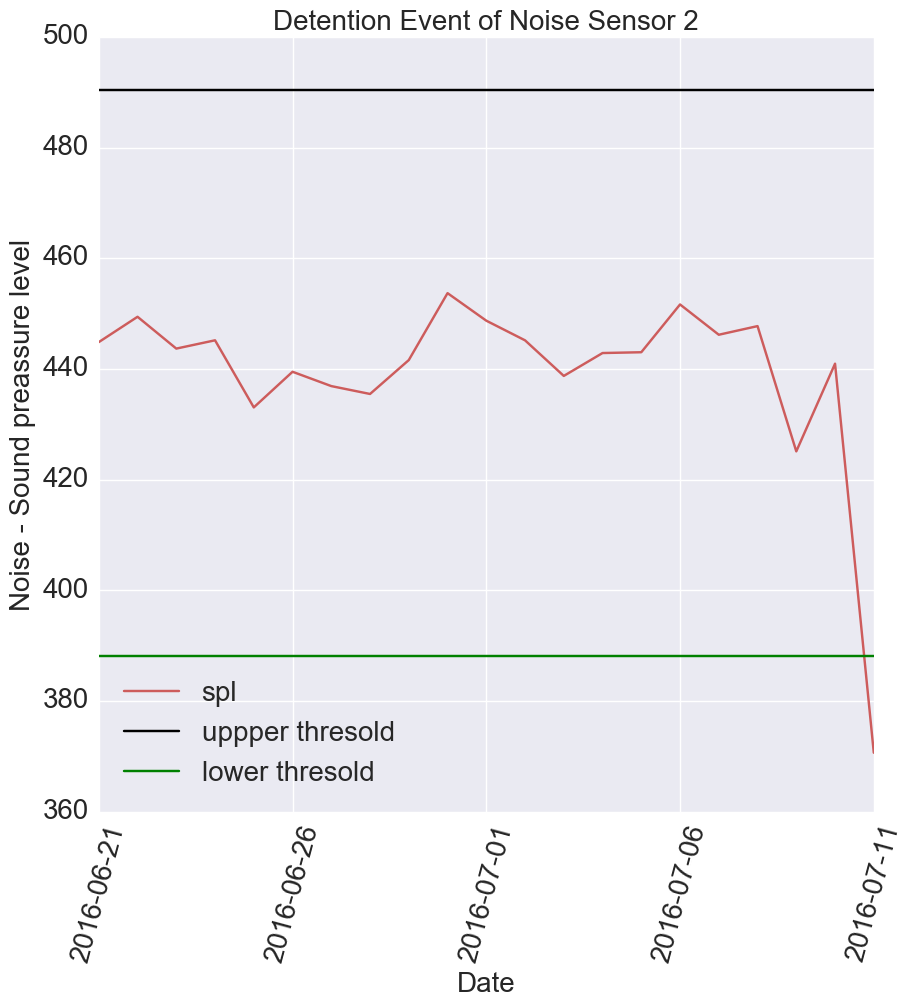

In [23]:
ax = sensor_spl_date.spl.plot(figsize=(10,10), color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k', label = 'uppper thresold')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='green', label = 'lower thresold')
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'best',fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Detention Event of Noise Sensor 2', fontsize=20)

**Fig.12:** Event detention and Time Series of noise (sound pressure level in dB)  by days measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen as very uniform. It can be seen that as the time series is uniform but has a significant drop.

In [24]:
#arithmentic prove

In [25]:
sensor_spl_date.loc[(sensor_spl_date.spl > thresholds[0])]

,spl
date,


In [26]:
sensor_spl_date.loc[(sensor_spl_date.spl < thresholds[1])]

,spl
date,
2016-07-11,370.694571


The drop is the day 11-07 which has a noise level of 370.694571 db